In [ ]:
pip install pertpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.0/627.0 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.9/291.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.6/560.6 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.2/824.2 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 4.5 MB/s eta 0:00

In [ ]:
# --- Standard-library utilities ------------------------------------------------
import os                 # file-system operations (e.g. os.environ or os.path)
import sys                # Python runtime details; we use it for version checks
import time               # simple timing / benchmarking of cells
from pathlib import Path  # convenient, cross-platform path handling
from collections import OrderedDict  # deterministic dicts for reproducible logs
import random             # Python RNG (seeded below for reproducibility)
import warnings           # warning control (e.g. to suppress scVI warnings)
import gdown              # enable google drive downloads
warnings.filterwarnings('ignore')  # suppress warnings (e.g. from scVI or scanpy)

# --- Numerical & data-handling stack -------------------------------------------
import numpy as np        # dense numerical arrays
import pandas as pd       # tabular data frames
from pandas.api.types import CategoricalDtype  # categorical data types
from scipy import sparse  # sparse matrix utilities
from scipy import stats   # statistical functions (e.g. t-tests, correlations)
from scipy.spatial.distance import cosine as cosine_dist, cdist  # distance metrics
from scipy.sparse import issparse  # check if a matrix is sparse

# --- Single-cell analysis ecosystem --------------------------------------------
import scanpy as sc       # core single-cell workflow (AnnData, QC, plotting)
from scanpy.pl import DotPlot # dot plots for visualising gene expression
import anndata            # core data structure for single-cell data (AnnData)
import pertpy as pt       # Perturb-Bench helpers: dataset loaders & metrics
import scvi               # single-cell variational inference (scVI) for deep learning
from scvi import REGISTRY_KEYS  # keys used by scvi-tools / scGen for AnnData metadata

# --- Deep-learning backend -----------------------------------------------------
import torch                    # PyTorch (Tensor operations)
import pytorch_lightning as pl  # PyTorch Lightning (high-level training framework)

# --- Machine-learning utilities ------------------------------------------------
from sklearn.decomposition import PCA                # dimensionality reduction
from sklearn.neighbors import KernelDensity          # density estimation
from sklearn.metrics import r2_score                 # R-squared metric
from sklearn.metrics import pairwise_distances       # pairwise distance metrics

# --- Plotting & visualisation --------------------------------------------------
import matplotlib.pyplot as plt  # base plotting library
import matplotlib as mpl         # base matplotlib library
import seaborn as sns            # higher-level statistical plots

# --- Device & runtime configuration --------------------------------------------
device = torch.device("cuda")
print(f"Running on'GPU'")

# --- Global reproducibility ----------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True   # exact determinism (may reduce speed)
torch.backends.cudnn.benchmark = False
pl.seed_everything(SEED, workers=True)
scvi.settings.seed = SEED

print(f"Random seed set to {SEED}")

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Running on'GPU'
Random seed set to 42


In [ ]:
adata = pt.dt.tian_2019_day7neuron()
adata

Output()

AnnData object with n_obs × n_vars = 182790 × 33752
    obs: 'batch', 'cancer', 'celltype', 'disease', 'guide_id', 'organism', 'perturbation', 'perturbation_type', 'sgRNA_read_count', 'sgRNA_umi_count', 'tissue_type', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'percent_hemo'
    var: 'ensemble_id', 'ncounts', 'ncells'

In [ ]:
adata.obs

batch  cancer             celltype  disease  \
AAACCTGAGAAACCAT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAAACGAG        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAAGCCCA        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAAGGTTT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAATTCCC        1   False  iPSC-induced neuron  healthy   
...                   ...     ...                  ...      ...   
TTTGTCATCTGGCGAC        2   False  iPSC-induced neuron  healthy   
TTTGTCATCTGTCCGT        2   False  iPSC-induced neuron  healthy   
TTTGTCATCTTAACCT-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCTTGCAAG-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCTTGTATC-1      2   False  iPSC-induced neuron  healthy   

                                                             guide_id  \
AAACCTGAGAAACCAT    control;MAT2A_sgRNA2;UBA1_sgRNA1;control;MAP3K...   
AAACCTGAGAAACGAG                                              control   
AAACCTGAGAAGCCCA                                       MAP3K12_sgRNA1   
AAACCTGAGAAGGTTT                             PMVK_sgRNA1;MAT2A_sgRNA2   
AAACCTGAGAATTCCC                                           LSS_sgRNA2   
...                                                               ...   
TTTGTCATCTGGCGAC                                              control   
TTTGTCATCTGTCCGT                                          MMAB_sgRNA2   
TTTGTCATCTTAACCT-1  RAB7A_sgRNA2;UBA1_sgRNA2;UQCRQ_sgRNA2;control;...   
TTTGTCATCTTGCAAG-1  UQCRQ_sgRNA2;UBA1_sgRNA1;PPCDC_sgRNA1;RFK_sgRN...   
TTTGTCATCTTGTATC-1  control;KIF1A_sgRNA2;TARS2_sgRNA1;SQLE_sgRNA2;...   

                   organism  \
AAACCTGAGAAACCAT      human   
AAACCTGAGAAACGAG      human   
AAACCTGAGAAGCCCA      human   
AAACCTGAGAAGGTTT      human   
AAACCTGAGAATTCCC      human   
...                     ...   
TTTGTCATCTGGCGAC      human   
TTTGTCATCTGTCCGT      human   
TTTGTCATCTTAACCT-1    human   
TTTGTCATCTTGCAAG-1    human   
TTTGTCATCTTGTATC-1    human   

                                                         perturbation  \
AAACCTGAGAAACCAT    UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A...   
AAACCTGAGAAACGAG                                              control   
AAACCTGAGAAGCCCA                                              MAP3K12   
AAACCTGAGAAGGTTT                                           PMVK_MAT2A   
AAACCTGAGAATTCCC                                                  LSS   
...                                                               ...   
TTTGTCATCTGGCGAC                                              control   
TTTGTCATCTGTCCGT                                                 MMAB   
TTTGTCATCTTAACCT-1                                   UBA1_RAB7A_UQCRQ   
TTTGTCATCTTGCAAG-1                               PPCDC_RFK_UBA1_UQCRQ   
TTTGTCATCTTGTATC-1                         UBA1_SQLE_MMAB_KIF1A_TARS2   

                   perturbation_type  \
AAACCTGAGAAACCAT              CRISPR   
AAACCTGAGAAACGAG              CRISPR   
AAACCTGAGAAGCCCA              CRISPR   
AAACCTGAGAAGGTTT              CRISPR   
AAACCTGAGAATTCCC              CRISPR   
...                              ...   
TTTGTCATCTGGCGAC              CRISPR   
TTTGTCATCTGTCCGT              CRISPR   
TTTGTCATCTTAACCT-1            CRISPR   
TTTGTCATCTTGCAAG-1            CRISPR   
TTTGTCATCTTGTATC-1            CRISPR   

                                                     sgRNA_read_count  \
AAACCTGAGAAACCAT    27495-23-12-10-5-5-4-2-2-2-2-1-1-1-1-1-1-1-1-1...   
AAACCTGAGAAACGAG                                                   82   
AAACCTGAGAAGCCCA                                                    1   
AAACCTGAGAAGGTTT                                                  3-3   
AAACCTGAGAATTCCC                                                    1   
...                                                               ...   
TTTGTCATCTGGCGAC                                                    1   
TTTGTCATCTGTCCGT       

In [ ]:
import scanpy as sc

# thresholds
min_genes = 500       # drop cells with very few detected genes
min_counts = 1000     # drop cells with very low UMI counts
max_mito = 8          # percent
max_ribo = 20         # percent
max_hemo = 10         # percent

# apply QC filters
adata = adata[
    (adata.obs["ngenes"] >= min_genes)
    & (adata.obs["ncounts"] >= min_counts)
    & (adata.obs["percent_mito"] <= max_mito)
    & (adata.obs["percent_ribo"] <= max_ribo)
    & (adata.obs["percent_hemo"] <= max_hemo)
].copy()

print(f"Cells before filtering: {adata.n_obs}")
print(f"Cells after filtering:  {adata.n_obs}")

Cells before filtering: 18387
Cells after filtering:  18387


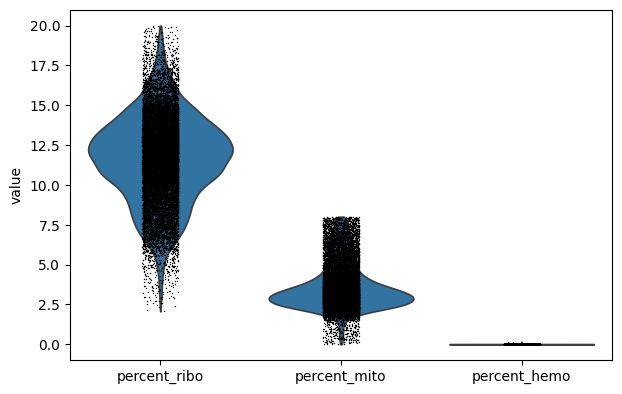

In [ ]:
# Use sc.pl.violin with the 'keys' and 'groupby' arguments
sc.pl.violin(adata, keys=['percent_ribo', 'percent_mito', 'percent_hemo'])
fig = plt.gcf()
display(fig)

In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Total number of cells
n_cells = adata.n_obs

# Target
target_n = 40000

# Ensure we're not oversampling
if target_n < n_cells:
    sampled_idx = np.random.choice(adata.obs_names, target_n, replace=False)
    adata = adata[sampled_idx].copy()
else:
    adata = adata.copy()  # no downsampling needed

In [ ]:
adata.obs = adata.obs.rename(columns={"perturbation": "gene_target"})

adata.obs["perturbation"] = adata.obs["gene_target"].apply(lambda x: "control" if x=="control" else "Perturbed")

adata.obs

batch  cancer             celltype  disease  \
AAACCTGAGAAACCAT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGACGCACA        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAGGACGG        1   False  iPSC-induced neuron  healthy   
AAACCTGAGATCCTGT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGCAGACTG        1   False  iPSC-induced neuron  healthy   
...                   ...     ...                  ...      ...   
TTTGTCATCATTGCCC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCATTTGGG-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCCAAGTAC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCCTTAATC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCGTCTGAA-1      2   False  iPSC-induced neuron  healthy   

                                                             guide_id  \
AAACCTGAGAAACCAT    control;MAT2A_sgRNA2;UBA1_sgRNA1;control;MAP3K...   
AAACCTGAGACGCACA                    KIF1A_sgRNA2;control;RAB7A_sgRNA2   
AAACCTGAGAGGACGG    UBA1_sgRNA2;MAT2A_sgRNA2;control;UBA1_sgRNA1;R...   
AAACCTGAGATCCTGT    MAT2A_sgRNA2;UBA1_sgRNA1;control;control;RAB7A...   
AAACCTGAGCAGACTG                            RAB7A_sgRNA2;MAT2A_sgRNA2   
...                                                               ...   
TTTGTCATCATTGCCC-1                                        UBA1_sgRNA1   
TTTGTCATCATTTGGG-1                                MMAB_sgRNA1;control   
TTTGTCATCCAAGTAC-1  GSR_sgRNA2;MAT2A_sgRNA2;UQCRQ_sgRNA2;NDUFA1_sg...   
TTTGTCATCCTTAATC-1  MAT2A_sgRNA1;MAT2A_sgRNA2;control;RAB7A_sgRNA2...   
TTTGTCATCGTCTGAA-1  UBA1_sgRNA1;MAT2A_sgRNA2;PPP2R1A_sgRNA1;contro...   

                   organism  \
AAACCTGAGAAACCAT      human   
AAACCTGAGACGCACA      human   
AAACCTGAGAGGACGG      human   
AAACCTGAGATCCTGT      human   
AAACCTGAGCAGACTG      human   
...                     ...   
TTTGTCATCATTGCCC-1    human   
TTTGTCATCATTTGGG-1    human   
TTTGTCATCCAAGTAC-1    human   
TTTGTCATCCTTAATC-1    human   
TTTGTCATCGTCTGAA-1    human   

                                                          gene_target  \
AAACCTGAGAAACCAT    UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A...   
AAACCTGAGACGCACA                                          RAB7A_KIF1A   
AAACCTGAGAGGACGG               PPP2R1A_UBA1_UQCRQ_RAB7A_RFK_MAT2A_MVK   
AAACCTGAGATCCTGT    UBA1_PPP2R1A_UQCRQ_FECH_UROD_RAB7A_RFK_MAT2A_M...   
AAACCTGAGCAGACTG                                          RAB7A_MAT2A   
...                                                               ...   
TTTGTCATCATTGCCC-1                                               UBA1   
TTTGTCATCATTTGGG-1                                               MMAB   
TTTGTCATCCAAGTAC-1  PPP2R1A_UBA1_UQCRQ_FECH_RAB7A_RFK_MAT2A_MMAB_G...   
TTTGTCATCCTTAATC-1  UBA1_PPP2R1A_UROD_RAB7A_RFK_MAT2A_SQLE_MAP3K12...   
TTTGTCATCGTCTGAA-1             PPP2R1A_UBA1_MAT2A_MAP3K12_MMAB_PGGT1B   

                   perturbation_type  \
AAACCTGAGAAACCAT              CRISPR   
AAACCTGAGACGCACA              CRISPR   
AAACCTGAGAGGACGG              CRISPR   
AAACCTGAGATCCTGT              CRISPR   
AAACCTGAGCAGACTG              CRISPR   
...                              ...   
TTTGTCATCATTGCCC-1            CRISPR   
TTTGTCATCATTTGGG-1            CRISPR   
TTTGTCATCCAAGTAC-1            CRISPR   
TTTGTCATCCTTAATC-1            CRISPR   
TTTGTCATCGTCTGAA-1            CRISPR   

                                                     sgRNA_read_count  \
AAACCTGAGAAACCAT    27495-23-12-10-5-5-4-2-2-2-2-1-1-1-1-1-1-1-1-1...   
AAACCTGAGACGCACA                                                1-1-1   
AAACCTGAGAGGACGG                            7776-10-4-3-3-3-2-1-1-1-1   
AAACCTGAGATCCTGT            11071-7-7-3-3-2-2-2-2-1-1-1-1-1-1-1-1-1-1   
AAACCTGAGCAGACTG                                                  2-2   
...                                                               ...   
TTTGTCATCATTGCCC-1                                                  1   
TTTGTCATCATTTGGG-1     

In [ ]:
adata.obs["perturbation"].value_counts()

perturbation
Perturbed    36556
control       3444
Name: count, dtype: int64

In [ ]:
# # Filter rows where the perturbation column is 'perturbed'
# perturbed_df = adata.obs[adata.obs["perturbation"] == "Perturbed"]

# # Extract the unique gene_target values from these rows
# perturbed_genes = perturbed_df["gene_target"].unique().tolist()

# print("🧬 Genes with perturbations:", perturbed_genes)

🧬 Genes with perturbations: ['UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A_RFK_MAT2A_SQLE_MAP3K12_MMAB_SEPSECS_PMVK_PPP1R8', 'MAP3K12', 'PMVK_MAT2A', 'LSS', 'PPP2R1A_FECH_RAB7A_RFK_MAT2A_LSS_MAP3K12_MVK', 'RAB7A_KIF1A', 'UBA1_PPP2R1A_MAT2A_MMAB', 'PPP2R1A_UBA1_UQCRQ_RAB7A_RFK_MAT2A_MVK', 'MMAB', 'RFK', 'MAT2A', 'UBA1_PPP2R1A_UQCRQ_FECH_UROD_RAB7A_RFK_MAT2A_MVK_MAP3K12_MMAB', 'UBA1', 'SQLE', 'RAB7A_MAT2A', 'RAB7A_RFK_MAT2A_MAP3K12_PGGT1B', 'RAB7A', 'UBA1_HACD2', 'UBA1_UQCRQ_FECH_MAT2A_MAP3K12_MVK_PMVK', 'MAP3K12_RAB7A_UQCRQ_MAT2A', 'RFK_MAT2A_MVK_MAP3K12_MMAB', 'MMAB_RAB7A', 'UBA1_PPP2R1A_RAB7A_RFK_MAT2A_MVK_MMAB_PGGT1B', 'MVK_UBA1', 'UBA1_RAB7A_MAT2A_MAP3K12_MMAB', 'UBA1_RFK_MAT2A', 'PPP2R1A', 'PPP2R1A_HACD2_UBA1_PPCDC_UROD_MAT2A_MAP3K12_ATP5A1', 'UBA1_HACD2_PPP2R1A_PPCDC_RAB7A_RFK_MAT2A_SQLE_MAP3K12_PGGT1B_ATP5B_NDUFA1', 'UBA1_RAB7A_MAT2A_MAP3K12', 'UBA1_HACD2_PPP2R1A_FECH_RAB7A_RFK_MAT2A_MAP3K12_MVK_KIF1A', 'HMGCS1_UBA1_PPP2R1A_UQCRQ_PPCDC_UROD_PMVK_RAB7A_MAT2A_MAP3K12_MVK_MMAB_KIF

In [ ]:
# # Select only combinations that contain 'NDUFA1'
# filtered = [combo for combo in perturbed_genes if "NDUFA1" in combo]

# print("Combinations with NDUFA1:", filtered)

Combinations with NDUFA1: ['UBA1_HACD2_PPP2R1A_PPCDC_RAB7A_RFK_MAT2A_SQLE_MAP3K12_PGGT1B_ATP5B_NDUFA1', 'HMGCS1_UBA1_PPP2R1A_UQCRQ_PPCDC_UROD_PMVK_RAB7A_MAT2A_MAP3K12_MVK_MMAB_KIF1A_NDUFA1_PPP1R8', 'MAP3K12_NDUFA1', 'UBA1_RFK_MAT2A_MAP3K12_MMAB_NDUFA1_PPP1R8', 'UBA1_PPP2R1A_HACD2_PPCDC_FECH_UROD_RAB7A_SQLE_MAT2A_MAP3K12_MMAB_NDUFA1', 'PPP2R1A_UBA1_UQCRQ_PPCDC_RFK_MAT2A_MAP3K12_NDUFA1', 'UBA1_HACD2_PPCDC_UROD_RAB7A_RFK_MAT2A_SQLE_MAP3K12_MVK_MMAB_PGGT1B_LSS_ATP5A1_PPP1R8_NDUFA1', 'NDUFA1', 'HMGCS1_UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_UROD_RAB7A_RFK_MAT2A_MAP3K12_MMAB_PGGT1B_GSR_ATP5A1_PMVK_NDUFA1', 'UBA1_PPP2R1A_PPCDC_FECH_RAB7A_MAT2A_LSS_MMAB_PMVK_NDUFA1', 'FECH_MMAB_SEPSECS_HMGCS1_HACD2_RAB7A_RFK_MVK_ATP5A1_NDUFA1_UBA1_UROD_LSS_GSR_KIF1A_PPP2R1A_UQCRQ_PPCDC_SQLE_MAT2A_MAP3K12', 'MAT2A_RFK_NDUFA1', 'FECH_MMAB_PGGT1B_SEPSECS_HACD2_RAB7A_RFK_MVK_ATP5A1_PPP1R8_NDUFA1_UBA1_UROD_GSR_KIF1A_PPP2R1A_UQCRQ_PPCDC_MAT2A_MAP3K12', 'UBA1_UQCRQ_RAB7A_RFK_MAT2A_NDUFA1', 'FECH_MMAB_PGGT1B_SEPSECS_HACD2_RAB7

In [ ]:
# # Create a DataFrame from the list version
# df = pd.DataFrame(filtered, columns=["gene_target"])
# df.to_csv("NDUFA1_combinations.csv", index=False)

In [ ]:
# # Create a DataFrame from your gene list
# df = pd.DataFrame(perturbed_genes, columns=["gene_name"])

# # Save to CSV (no index column)
# df.to_csv("perturbed_gene_list.csv", index=False)

# print("✅ CSV file saved: 'perturbed_gene_list.csv'")

✅ CSV file saved: 'perturbed_gene_list.csv'


# Testing Mixscape

In [ ]:
sc.pp.normalize_total(adata)

In [ ]:
sc.pp.log1p(adata)

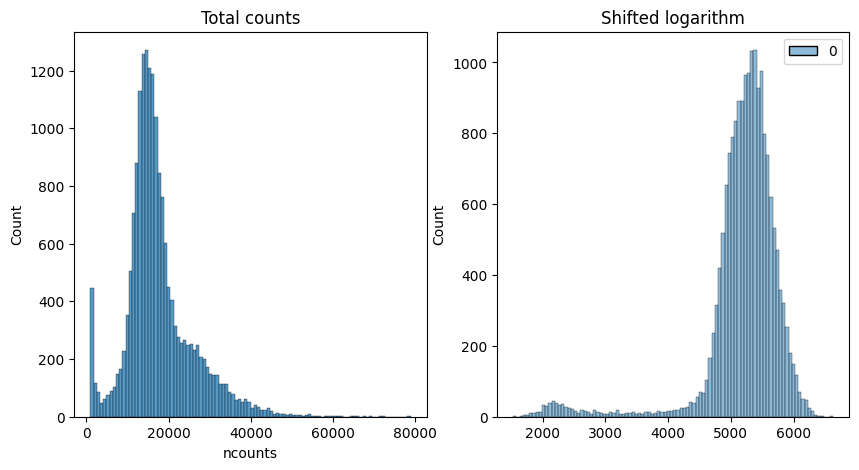

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["ncounts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.X.sum(axis=1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
fig = plt.gcf()
display(fig)

In [ ]:
sc.pp.highly_variable_genes(adata, subset=True)

In [ ]:
adata

AnnData object with n_obs × n_vars = 18387 × 3439
    obs: 'batch', 'cancer', 'celltype', 'disease', 'guide_id', 'organism', 'gene_target', 'perturbation_type', 'sgRNA_read_count', 'sgRNA_umi_count', 'tissue_type', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'percent_hemo', 'perturbation'
    var: 'ensemble_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

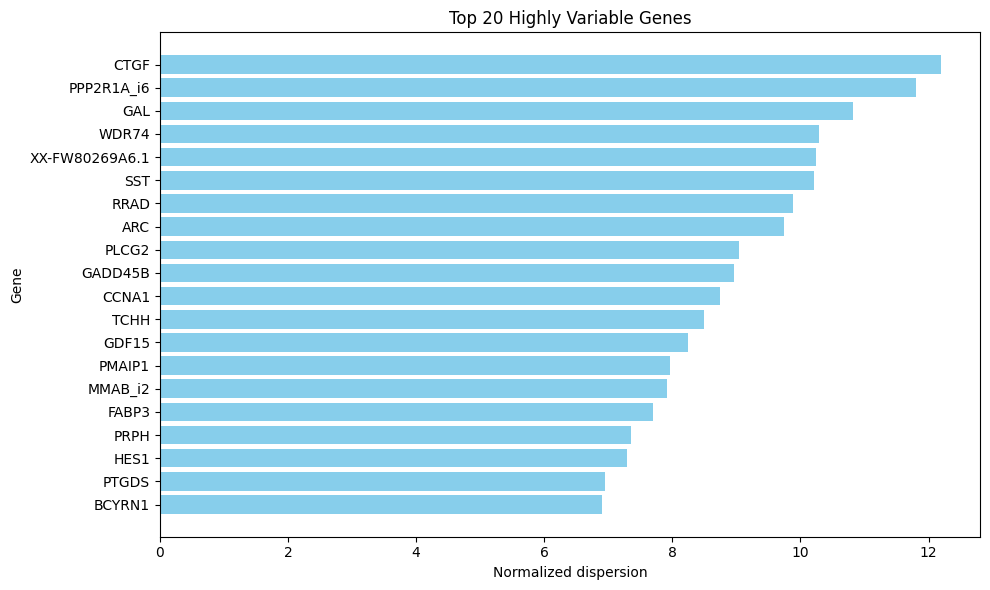

In [ ]:
import matplotlib.pyplot as plt

top_hvgs = adata.var[adata.var['highly_variable']].sort_values('dispersions_norm', ascending=False).head(20)

plt.figure(figsize=(10,6))
plt.barh(top_hvgs.index[::-1], top_hvgs['dispersions_norm'][::-1], color='skyblue')
plt.xlabel("Normalized dispersion")
plt.ylabel("Gene")
plt.title("Top 20 Highly Variable Genes")
plt.tight_layout()
fig = plt.gcf()
display(fig)

In [ ]:
sc.pp.pca(adata)

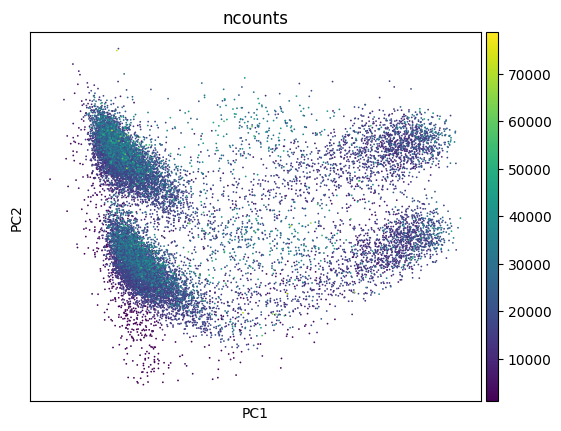

In [ ]:
sc.pl.pca_scatter(adata, color="ncounts")
fig = plt.gcf()
display(fig)

In [ ]:
sc.pp.neighbors(adata, metric="cosine")

In [ ]:
sc.tl.umap(adata)

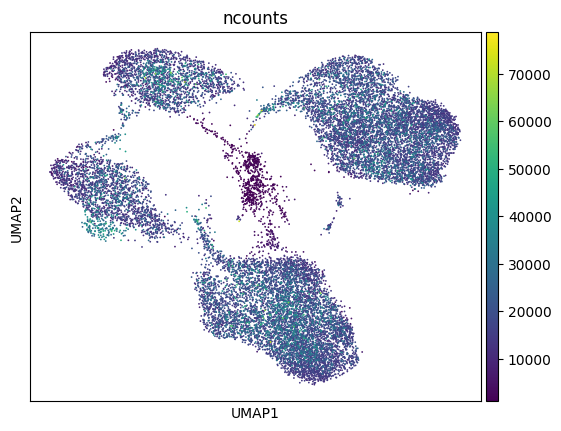

In [ ]:
sc.pl.umap(adata, color="ncounts")
fig = plt.gcf()
display(fig)

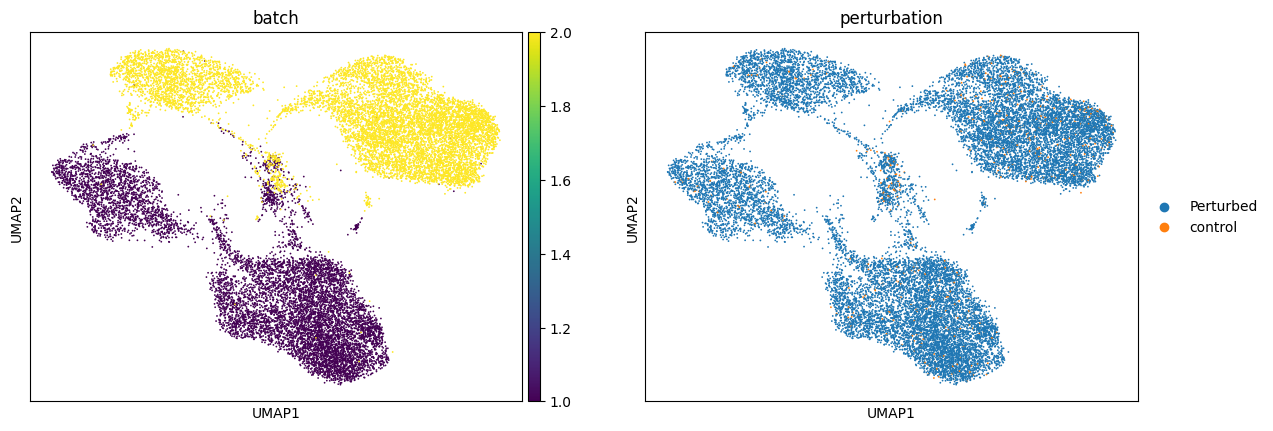

In [ ]:
sc.pl.umap(adata, color=["batch", "perturbation"])
fig = plt.gcf()
display(fig)

# Calculating local perturbation signatures mitigates confounding effects

To regress out the confounding effects, we calculate local perturbation signatures. For each cell, we identify n_neighbors cells from the control pool with the most similar mRNA expression profiles. The perturbation signature is calculated by subtracting the averaged mRNA expression profile of the control neighbors from the mRNA expression profile of each cell.

In [ ]:
# core mixscape function
ms = pt.tl.Mixscape()
ms.perturbation_signature(adata, pert_key="perturbation", control="control")

In [ ]:
adata_pert = adata.copy()

In [ ]:
adata_pert.X = adata_pert.layers["X_pert"]

In [ ]:
sc.pp.pca(adata_pert)

In [ ]:
sc.pp.neighbors(adata_pert, metric="cosine")

In [ ]:
sc.tl.umap(adata_pert)

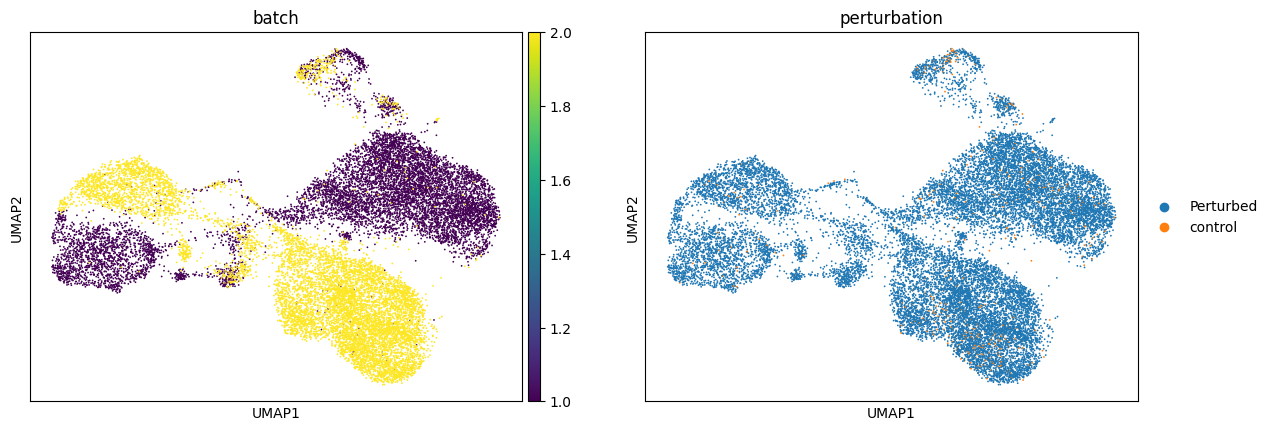

In [ ]:
sc.pl.umap(adata_pert, color=["batch", "perturbation"])
fig = plt.gcf()
display(fig)

In [ ]:
ms.mixscape(adata=adata, control="control", labels="perturbation", layer="X_pert")

In [ ]:
adata.obs

batch  cancer             celltype  disease  \
AAACCTGAGAAACCAT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGACGCACA        1   False  iPSC-induced neuron  healthy   
AAACCTGAGAGGACGG        1   False  iPSC-induced neuron  healthy   
AAACCTGAGATCCTGT        1   False  iPSC-induced neuron  healthy   
AAACCTGAGCAGACTG        1   False  iPSC-induced neuron  healthy   
...                   ...     ...                  ...      ...   
TTTGTCATCATTGCCC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCATTTGGG-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCCAAGTAC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCCTTAATC-1      2   False  iPSC-induced neuron  healthy   
TTTGTCATCGTCTGAA-1      2   False  iPSC-induced neuron  healthy   

                                                             guide_id  \
AAACCTGAGAAACCAT    control;MAT2A_sgRNA2;UBA1_sgRNA1;control;MAP3K...   
AAACCTGAGACGCACA                    KIF1A_sgRNA2;control;RAB7A_sgRNA2   
AAACCTGAGAGGACGG    UBA1_sgRNA2;MAT2A_sgRNA2;control;UBA1_sgRNA1;R...   
AAACCTGAGATCCTGT    MAT2A_sgRNA2;UBA1_sgRNA1;control;control;RAB7A...   
AAACCTGAGCAGACTG                            RAB7A_sgRNA2;MAT2A_sgRNA2   
...                                                               ...   
TTTGTCATCATTGCCC-1                                        UBA1_sgRNA1   
TTTGTCATCATTTGGG-1                                MMAB_sgRNA1;control   
TTTGTCATCCAAGTAC-1  GSR_sgRNA2;MAT2A_sgRNA2;UQCRQ_sgRNA2;NDUFA1_sg...   
TTTGTCATCCTTAATC-1  MAT2A_sgRNA1;MAT2A_sgRNA2;control;RAB7A_sgRNA2...   
TTTGTCATCGTCTGAA-1  UBA1_sgRNA1;MAT2A_sgRNA2;PPP2R1A_sgRNA1;contro...   

                   organism  \
AAACCTGAGAAACCAT      human   
AAACCTGAGACGCACA      human   
AAACCTGAGAGGACGG      human   
AAACCTGAGATCCTGT      human   
AAACCTGAGCAGACTG      human   
...                     ...   
TTTGTCATCATTGCCC-1    human   
TTTGTCATCATTTGGG-1    human   
TTTGTCATCCAAGTAC-1    human   
TTTGTCATCCTTAATC-1    human   
TTTGTCATCGTCTGAA-1    human   

                                                          gene_target  \
AAACCTGAGAAACCAT    UBA1_PPP2R1A_HACD2_UQCRQ_PPCDC_FECH_UROD_RAB7A...   
AAACCTGAGACGCACA                                          RAB7A_KIF1A   
AAACCTGAGAGGACGG               PPP2R1A_UBA1_UQCRQ_RAB7A_RFK_MAT2A_MVK   
AAACCTGAGATCCTGT    UBA1_PPP2R1A_UQCRQ_FECH_UROD_RAB7A_RFK_MAT2A_M...   
AAACCTGAGCAGACTG                                          RAB7A_MAT2A   
...                                                               ...   
TTTGTCATCATTGCCC-1                                               UBA1   
TTTGTCATCATTTGGG-1                                               MMAB   
TTTGTCATCCAAGTAC-1  PPP2R1A_UBA1_UQCRQ_FECH_RAB7A_RFK_MAT2A_MMAB_G...   
TTTGTCATCCTTAATC-1  UBA1_PPP2R1A_UROD_RAB7A_RFK_MAT2A_SQLE_MAP3K12...   
TTTGTCATCGTCTGAA-1             PPP2R1A_UBA1_MAT2A_MAP3K12_MMAB_PGGT1B   

                   perturbation_type  \
AAACCTGAGAAACCAT              CRISPR   
AAACCTGAGACGCACA              CRISPR   
AAACCTGAGAGGACGG              CRISPR   
AAACCTGAGATCCTGT              CRISPR   
AAACCTGAGCAGACTG              CRISPR   
...                              ...   
TTTGTCATCATTGCCC-1            CRISPR   
TTTGTCATCATTTGGG-1            CRISPR   
TTTGTCATCCAAGTAC-1            CRISPR   
TTTGTCATCCTTAATC-1            CRISPR   
TTTGTCATCGTCTGAA-1            CRISPR   

                                                     sgRNA_read_count  \
AAACCTGAGAAACCAT    27495-23-12-10-5-5-4-2-2-2-2-1-1-1-1-1-1-1-1-1...   
AAACCTGAGACGCACA                                                1-1-1   
AAACCTGAGAGGACGG                            7776-10-4-3-3-3-2-1-1-1-1   
AAACCTGAGATCCTGT            11071-7-7-3-3-2-2-2-2-1-1-1-1-1-1-1-1-1-1   
AAACCTGAGCAGACTG                                                  2-2   
...                                                               ...   
TTTGTCATCATTGCCC-1                                                  1   
TTTGTCATCATTTGGG-1     

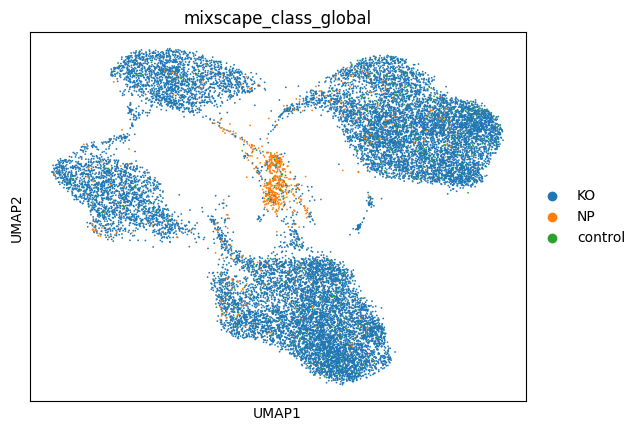

In [ ]:
sc.pl.umap(adata, color=["mixscape_class_global"])
fig = plt.gcf()
display(fig)

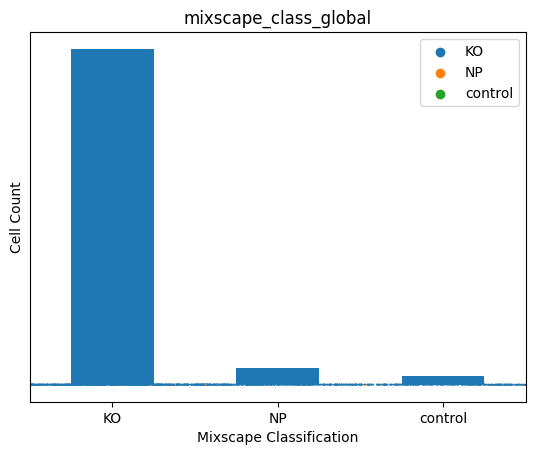

In [ ]:
classification_counts = adata.obs["mixscape_class_global"].value_counts()
classification_counts.plot(kind="bar")
plt.xlabel("Mixscape Classification")
plt.ylabel("Cell Count")
fig = plt.gcf()
display(fig)

In [ ]:
adata.obs["perturbed_cleaned"] = adata.obs.apply(
    lambda row: ("control" if row["mixscape_class_global"] == "NP" else row["perturbation"]),
    axis=1,
).astype("category")

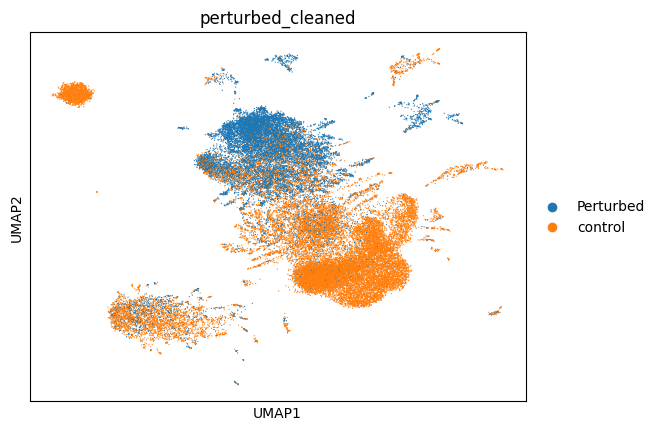

In [ ]:
sc.pl.umap(adata, color=["perturbed_cleaned"])
fig = plt.gcf()
display(fig)

In [ ]:
adata.write("day7neuron_with_Mixscape.h5ad")

In [ ]:
# ko_gene_targets = adata.obs.loc[adata.obs["mixscape_class_global"] == "KO", "gene_target"].unique()
# print(ko_gene_targets)

['HMGCS1_UBA1_PPP2R1A_FECH_PPCDC_UROD_RFK_MAT2A..., 'UBA1_RAB7A_MAT2A_MVK', 'MAP3K12_PPP2R1A_RAB7A', 'PPCDC_UROD_UBA1_HACD2', 'UBA1_FECH_UROD_MAT2A_MVK_MAP3K12', ..., 'UBA1_RFK_MAT2A_MAP3K12_GSR', 'PPCDC_RAB7A_PGGT1B', 'HMGCS1_UBA1_HACD2_UROD_RAB7A_MAT2A_MVK_MMAB_G..., 'HMGCS1_UBA1_HACD2_PPP2R1A_UROD_RAB7A_SQLE_MAT..., 'UBA1_PPP2R1A_UQCRQ_UROD_RAB7A_RFK_MAT2A_MAP3K...]
Length: 6731
Categories (11383, object): ['ATP5A1', 'ATP5A1_HACD2_RFK', 'ATP5A1_HACD2_UQCRQ',
                             'ATP5A1_HMGCS1_RFK_MAT2A', ..., 'UROD_UBA1_UQCRQ', 'UROD_UQCRQ',
                             'UROD_UQCRQ_MAT2A', 'control']


In [ ]:
# import pandas as pd

# # Convert the array to a DataFrame
# ko_df = pd.DataFrame(ko_gene_targets, columns=["KO_gene_target"])
# ko_df.to_csv("KO_Mixscape.csv", index=False)

In [ ]:
# genes_of_interest = [
#     "HSPA5", "TUBB4A", "NDUFA2", "NDUFA9", "NDUFV1", "NDUFS8",
#     "MAPT", "CASP3", "BAX", "CYCS", "EIF2S1", "BECN1", "SOD1", "DCTN1"
# ]

# # Split the KO gene strings into lists of individual genes
# ko_df["KO_gene_target"] = ko_df["KO_gene_target"].str.split("_")

# # Flatten the list of all KO genes across all rows
# all_ko_genes = set(gene for sublist in ko_df["KO_gene_target"] for gene in sublist)

# # Check which of your genes of interest are present
# present_genes = [gene for gene in genes_of_interest if gene in all_ko_genes]
# missing_genes = [gene for gene in genes_of_interest if gene not in all_ko_genes]

# print("✅ Present genes:", present_genes)
# print("❌ Missing genes:", missing_genes)

✅ Present genes: []
❌ Missing genes: ['HSPA5', 'TUBB4A', 'NDUFA2', 'NDUFA9', 'NDUFV1', 'NDUFS8', 'MAPT', 'CASP3', 'BAX', 'CYCS', 'EIF2S1', 'BECN1', 'SOD1', 'DCTN1']


In [ ]:
# all_ko_genes

{'ATP5A1',
 'ATP5B',
 'FECH',
 'GSR',
 'HACD2',
 'HMGCS1',
 'KIF1A',
 'LSS',
 'MAP3K12',
 'MAT2A',
 'MMAB',
 'MVK',
 'NDUFA1',
 'PGGT1B',
 'PMVK',
 'PPCDC',
 'PPP1R8',
 'PPP2R1A',
 'RAB7A',
 'RFK',
 'SEPSECS',
 'SQLE',
 'TARS2',
 'UBA1',
 'UQCRQ',
 'UROD'}

In [ ]:
# # Split guide_id strings at semicolon and take the first guide that isn't "control"
# def extract_main_guide(guides):
#     gids = [g for g in guides.split(';') if g != 'control']
#     return gids[0] if gids else 'control'

# adata.obs['main_guide'] = adata.obs['guide_id'].astype(str).apply(extract_main_guide).astype('category')